In [1]:
import numpy as np
import visualization
from NeuralNetwork import*
np.random.seed(1)

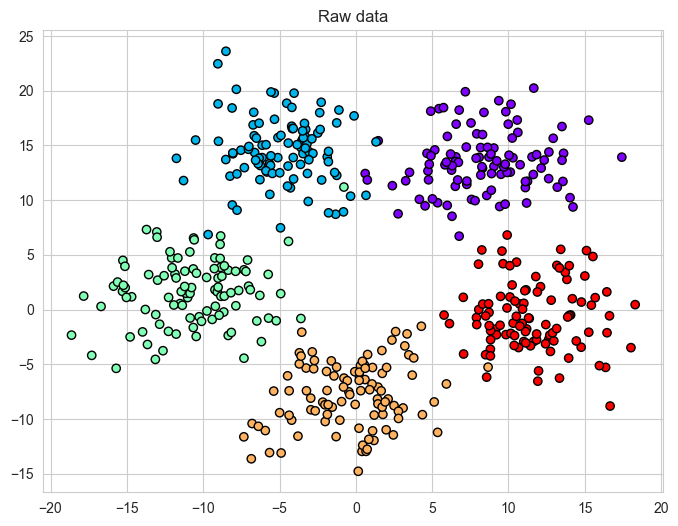

In [2]:
# load data
data = np.loadtxt('tren_data2___09.txt')
# data = np.loadtxt('tren_data2___09.txt')

visualization.plot_data(data, title='Raw data')

In [3]:
# shuffle data
data = np.random.permutation(data)
data_train = data[:int(len(data)*0.8)]
data_test = data[int(len(data)*0.8):]
x_train = data_train[:,:-1].T
y_train_raw = data_train[:,-1]
x_test = data_test[:,:-1].T
y_test = data_test[:,-1]
num_classes = len(np.unique(y_train_raw))

# to one hot
def to_one_hot(y, num_classes):
    y = y.astype(int)
    one_hot = np.zeros((num_classes, y.shape[0]), dtype=int)
    for i in range(y.shape[0]):
        one_hot[y[i]-1, i] = 1
    return one_hot
y_train = to_one_hot(y_train_raw, num_classes)
y_test = y_test.reshape(1, y_test.shape[0])

In [4]:
print ('Number of training examples: ', x_train.shape[1])
print ('Number of testing examples: ', x_test.shape[1])
print ('------')
print ('x_train shape: ', x_train.shape)
print ('y_train shape: ', y_train.shape)
print ('x_test shape: ', x_test.shape)
print ('y_test shape: ', y_test.shape)
print ('------')
print ('Number of classes: ', num_classes)

Number of training examples:  400
Number of testing examples:  100
------
x_train shape:  (2, 400)
y_train shape:  (5, 400)
x_test shape:  (2, 100)
y_test shape:  (1, 100)
------
Number of classes:  5


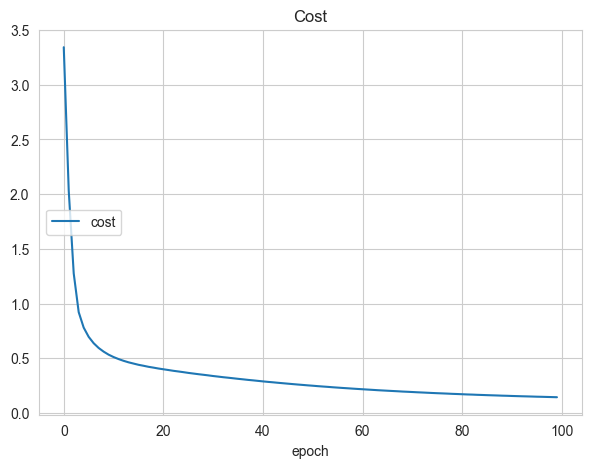

Cost after epoch 99: 5.3528514185942535e-05


In [5]:
input_layer = x_train.shape[0] # set input layer size
dims = [input_layer,12, 6, 5] # set layer number and sizes

# parameters, costs = model(x_train, y_train, dims, learning_rate=0.0075, epochs = 2000, print_cost = True)
nn = DNNClassifier(dims, [DNNClassifier.relu,DNNClassifier.relu, DNNClassifier.softmax])
# costs = nn.train(x_train, y_train, learning_rate=0.0075, epochs = 100, batch_size=10, print_cost = True)
costs = nn.train(x_train, y_train, learning_rate=0.00006, epochs = 100, batch_size=1, print_cost = True)

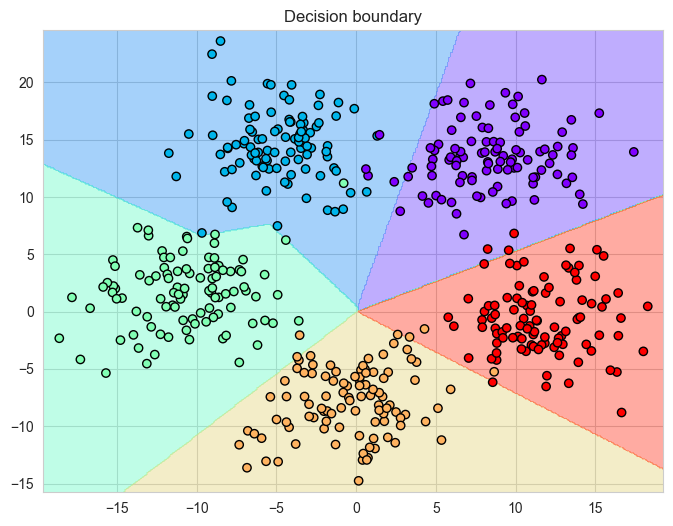

In [6]:
%matplotlib inline
visualization.plot_decision_boundary(data, nn, title='Decision boundary')


In [7]:
A = nn.forward_propagation(x_test)

accuracy:        0.95
confusion matrix: 


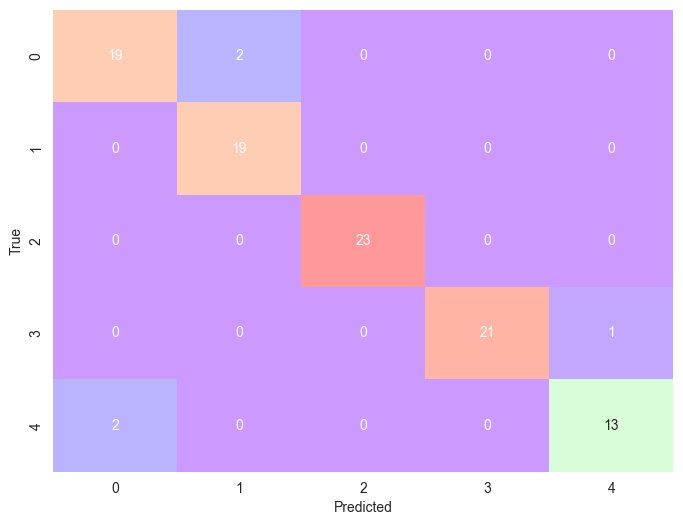

In [8]:
accuracy, confusion_matrix = nn.evaluate(x_test, y_test, confusion_matrix=True)
print('accuracy:       ', accuracy)
print('confusion matrix: ')
visualization.plot_confusion_matrix(confusion_matrix)

In [9]:
print(A.shape[0])
preds = np.argmax(A, axis=0)
print(preds)
print(np.array(y_test, dtype=int)[0])
import seaborn as sns
colors = sns.color_palette(palette='Set2')
print(colors)

5
[1 0 3 2 4 1 2 1 4 2 2 1 1 0 4 1 3 3 2 1 1 2 4 1 1 2 3 2 3 0 1 1 0 2 3 1 3
 3 0 0 0 2 0 4 0 4 3 4 0 1 0 1 4 2 2 2 3 3 0 3 0 3 3 0 4 1 0 3 2 2 0 0 3 4
 1 2 4 0 4 3 2 2 1 2 3 2 0 4 1 1 4 3 1 2 3 2 0 3 2 0]
[2 1 4 3 5 1 3 2 5 3 3 2 2 1 5 2 4 4 3 2 2 3 5 2 2 3 4 3 4 1 2 1 1 3 4 2 4
 4 1 1 1 3 1 5 1 5 4 5 1 2 5 2 5 3 3 3 4 4 1 4 1 4 4 1 5 2 1 4 3 3 1 1 4 5
 2 3 4 5 5 4 3 3 2 3 4 3 1 5 2 2 5 4 2 3 4 3 1 4 3 1]
[(0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]


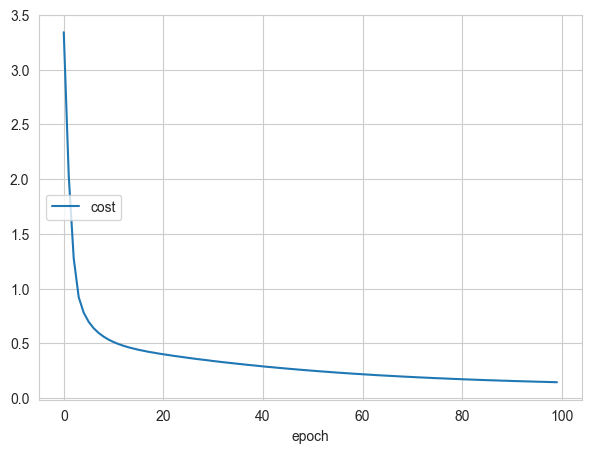

In [10]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(cost, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    # for label,data in data_dict.items():
    #     plt.plot(data, label=label)
    plt.plot(cost, label='cost')
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show()


# Then in a loop you populate a dictionary and you pass it to live_plot():

data = collections.defaultdict(list)
cost_history = []
for i in range(len(costs)):
    # data['foo'].append(np.random.random())
    # data['bar'].append(np.random.random())
    # data['baz'].append(np.random.random())
    cost_history.append(costs[i])
    live_plot(cost_history)

In [11]:
nn.activations

[<function NeuralNetwork.DNNClassifier.relu(Z, derivative=False)>,
 <function NeuralNetwork.DNNClassifier.relu(Z, derivative=False)>,
 <function NeuralNetwork.DNNClassifier.softmax(Z, derivative=False)>]

In [12]:
import utilities
X2,y2 = utilities.multiClass_Data(N=200,K=3)
# change the numbering of classes from 0,1,2 to 2,1,0
y2_temp = y2.copy()
# y2[y2_temp==0] = 2
# y2[y2_temp==1] = 0
# y2[y2_temp==2] = 1


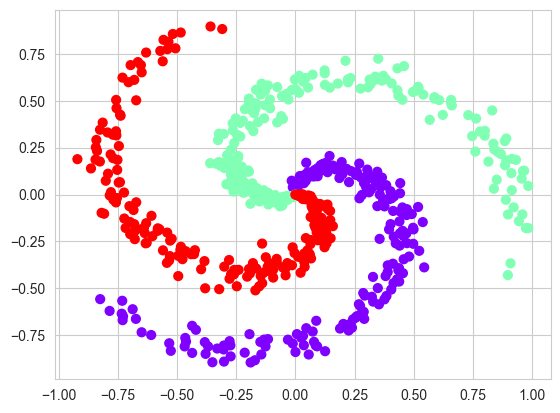

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=40, cmap=plt.cm.rainbow)
plt.show()
X2 = X2.T  # Reshaping as (n x m)
# Converting to one hot matrix
y2_hot = to_one_hot(y2, 3)

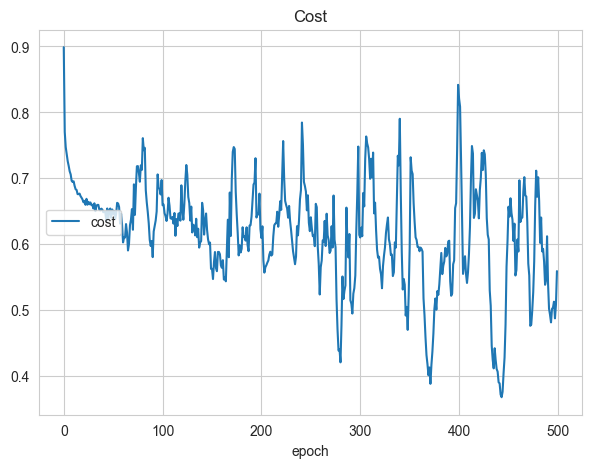

Cost after epoch 499: 0.4140656302947557


In [18]:

af2 = 'relu'
# layer_dims2 = [X2.shape[0],24,12,y2_hot.shape[0]]
# nn2 = DNNClassifier(layer_dims2, [DNNClassifier.relu,DNNClassifier.relu, DNNClassifier.sigmoid])
# a= nn2.train(X2, y2_hot, learning_rate=0.006, epochs = 4000, batch_size=50, print_cost = True)

# layer_dims2 = [X2.shape[0],12,6,y2_hot.shape[0]]
# nn2 = DNNClassifier(layer_dims2, [DNNClassifier.relu,DNNClassifier.relu, DNNClassifier.sigmoid])
# a= nn2.train(X2, y2_hot, learning_rate=0.06, epochs = 1000, batch_size=50, print_cost = True)

layer_dims2 = [X2.shape[0],64,32,y2_hot.shape[0]]
nn2 = DNNClassifier(layer_dims2, [DNNClassifier.relu,DNNClassifier.relu, DNNClassifier.softmax])
a= nn2.train(X2, y2_hot, learning_rate=0.06, epochs = 500, batch_size=10, print_cost = True)


(2, 600)
(600,)
(1, 600)


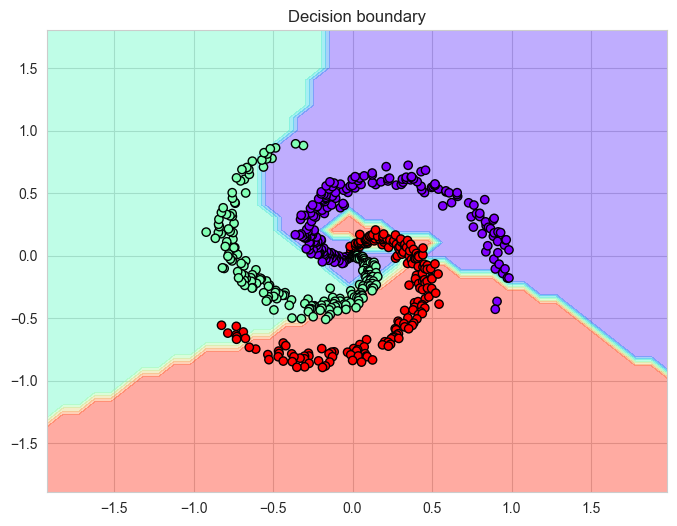

In [15]:
%matplotlib inline
print(X2.shape)
print(y2.shape)
y2[y2_temp==0] = 2
y2[y2_temp==1] = 0
y2[y2_temp==2] = 1
y22 = y2.reshape(1, y2.shape[0])
print(y22.shape)
# conbine X and y to matrix to plot
# x shape (600, 2)
# y shape (600, )
data = np.concatenate((X2.T, y22.T), axis=1)
visualization.plot_decision_boundary(data, nn2, title='Decision boundary')

In [16]:
a = np.array([[1, 2,5], [3, 4,5]])

b = np.array([[5, 6]])

print(a.shape)
print(b.shape)
print(np.concatenate((a, b.T), axis=1))

(2, 3)
(1, 2)
[[1 2 5 5]
 [3 4 5 6]]


In [17]:
print(data.shape)

(600, 3)
